In [20]:
import cv2
import matplotlib.pyplot as plt


def visualize(entry):
  image_name = entry['image_name'] + '.png'
  boxes = entry['BoxesString']
  test_img = cv2.imread('train/'+image_name)
  boxes = boxes.split(';')
  boxes = [list(map(int, box.split(' '))) for box in boxes]
  for (x,y,xx,yy) in boxes:
    cv2.rectangle(test_img,(int(x),int(y)),(int(xx),int(yy)),(255,0,0),5)
  plt.imshow(test_img[...,::-1])

In [21]:
import pandas as pd
import os

train_df = pd.read_csv('train.csv')

In [22]:
files = list(os.listdir('train'))
files[0], len(files)

('387db0142989e1b6c74559e484bfeee730f4798b93b8fb1d3b848cc9470daa85.png', 3655)

In [23]:
names = list(set(train_df['image_name'].tolist()))
names[0], len(names)

('3fa6a4cee6918d0634690605931ef788c71d5476b4158a2668361291b61f886f', 3655)

In [24]:
names_list = train_df['image_name'].tolist()
len(names_list)

3657

In [25]:
from collections import Counter

count_dict = dict(Counter(names_list))

In [26]:
for key in count_dict.keys():
  if count_dict[key] != 1:
    print(key)

73d4c61b8be64a946df940e3e5cdceecb662960363c84a29fb8e99d4b660fa0e
8ec1474b9cdc0fd870b443439daa56660c57140c051a8a49052d22d828728f12


In [27]:
target = '73d4c61b8be64a946df940e3e5cdceecb662960363c84a29fb8e99d4b660fa0e'

for index, name in enumerate(names_list):
  if name == target:
    print(index)

7
72


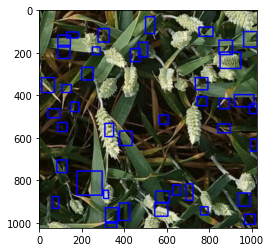

In [28]:
visualize(train_df.iloc[7])

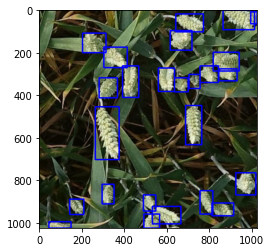

In [29]:
visualize(train_df.iloc[72])

In [30]:
target = '8ec1474b9cdc0fd870b443439daa56660c57140c051a8a49052d22d828728f12'

for index, name in enumerate(names_list):
  if name == target:
    print(index)

16
85


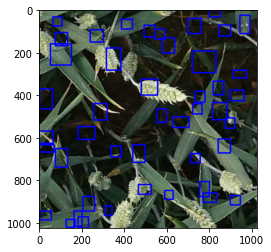

In [31]:
visualize(train_df.iloc[16])

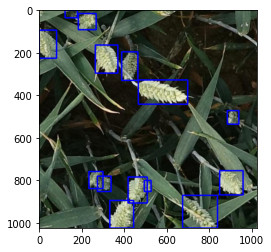

In [32]:
visualize(train_df.iloc[85])

In [33]:
clean_df = train_df.drop(train_df.index[[7, 16]])
clean_df.head()

,image_name,BoxesString,domain
0,7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...,949 967 999 994;368 649 443 685;118 280 185 33...,0
1,0e37ccf64ccbd456f07dcfe110133018f324e5bdf63b08...,691 60 730 119;838 901 897 969;477 444 526 489...,0
2,89e0aa4148f0a9ff01e9e55c5a2bcbe294150444dbe43c...,953 178 1023 244;265 164 326 228;657 790 689 8...,0
3,fed8dde94c7a51de782b71f45c9115cdf7208cf7f33eee...,801 402 882 459;214 924 271 1023;299 726 360 7...,0
4,8a593fc7894c37145d302bce36822bf21725088cf17b23...,187 887 294 1003;631 343 679 386;337 719 402 7...,0


In [34]:
clean_df = clean_df.reset_index(drop=True)
clean_df.to_csv('clean_train.csv')